In [4]:
import numpy as np
from matplotlib import pyplot as plt
import cobra

# 0. Preprocessing

In [87]:
#Make flux range list of nitrogen uptake (0.5-bins)
rxn_range = np.arange(0, 15, 0.5)

#Make dictionaries for the Biomass objective function of each nitrogen condition
nh4_bof = {}
cytd_bof = {}
csn_bof = {}

#Load genome-scale metabolic model of E. coli K-12 MG1655
nh4_model_dir = "iML1515.xml"
nh4_model = cobra.io.read_sbml_model(nh4_model_dir)

rxn = nh4_model.reactions
mtb  = nh4_model.metabolites
gene = nh4_model.genes
print ("Reactions of %s are %s" %(nh4_model_dir.split(".xml")[0], len(rxn)))
print ("Metabolites of %s are %s" %(nh4_model_dir.split(".xml")[0], len(mtb)))
print ("Genes of %s are %s" %(nh4_model_dir.split(".xml")[0], len(gene)))

cytd_model_dir = nh4_model_dir
csn_model_dir = nh4_model_dir
cytd_model = cobra.io.read_sbml_model(cytd_model_dir)
csn_model = cobra.io.read_sbml_model(csn_model_dir)

Reactions of iML1515 are 2712
Metabolites of iML1515 are 1877
Genes of iML1515 are 1516


# 1. Constraint setting from HPLC result

In [88]:
#Glucose uptake rate for ammonia condition
nh4_glc_uptake = -11.18
#Glucose uptake rate, uridine export rate, and uracil export rate for cytidine condition
cytd_glc_uptake = -6.48
cytd_uri_export = 5.29 
cytd_ura_export = 4.52
#Glucose uptake rate and uracil export rate for cytidine condition
csn_glc_uptake = -7.25
csn_ura_export = 6.44

#Change growth rate(LN) to BOF(Log2) 
nh4_growth = 0.645/np.log(2)
cytd_growth = 0.585/np.log(2)
csn_growth = 0.433/np.log(2)

# 2. Calculate nitrogen uptake rates

In [89]:
for nh4_uptake in rxn_range:    
    nh4_model.reactions.EX_nh4_e.lower_bound = -nh4_uptake
    nh4_model.reactions.EX_glc__D_e.lower_bound = nh4_glc_uptake
    solution = nh4_model.optimize().f
    nh4_bof[nh4_uptake] = solution
    
for i in nh4_bof:
    if nh4_bof[i] > nh4_growth:
        print ("EX_nh4_e lower_bound limit is "+ str(i-0.5))
        print ("EX_nh4_e upper_bound limit is "+ str(i))
        tem_nh4_range = [i-0.5, i]
        break
nh4_range = np.arange(tem_nh4_range[0], tem_nh4_range[1], 0.01)

for nh4_uptake in nh4_range:    
    nh4_model.reactions.EX_nh4_e.lower_bound = -nh4_uptake
    nh4_model.reactions.EX_glc__D_e.lower_bound = nh4_glc_uptake
    solution = nh4_model.optimize().f
    if solution > nh4_growth:
        final_nh4_uptake = -nh4_uptake
        print ("Predicted ammonia uptake rate is " + str(final_nh4_uptake) + " mmol/gDCW/hr")
        break

EX_nh4_e lower_bound limit is 10.0
EX_nh4_e upper_bound limit is 10.5
Predicted ammonia uptake rate is -10.049999999999999 mmol/gDCW/hr


In [90]:
for cytd_uptake in rxn_range:    
    cytd_model.reactions.EX_nh4_e.lower_bound = 0.
    cytd_model.reactions.EX_3hpp_e.lower_bound = 0.
    
    cytd_model.reactions.EX_cytd_e.lower_bound = -cytd_uptake
    cytd_model.reactions.EX_glc__D_e.lower_bound = cytd_glc_uptake
    cytd_model.reactions.EX_uri_e.lower_bound = cytd_uri_export
    cytd_model.reactions.EX_ura_e.lower_bound = cytd_ura_export
    solution = cytd_model.optimize().f
    if solution == None:
        solution = 0.0
    cytd_bof[cytd_uptake] = solution
    
for i in cytd_bof:
    if cytd_bof[i] > cytd_growth:
        print ("EX_cytd_e lower_bound limit is "+ str(i-0.5))
        print ("EX_cytd_e upper_bound limit is "+ str(i))
        tem_cytd_range = [i-0.5, i]
        break
cytd_range = np.arange(tem_cytd_range[0], tem_cytd_range[1], 0.01)

for cytd_uptake in cytd_range:    
    cytd_model.reactions.EX_cytd_e.lower_bound = -cytd_uptake
    cytd_model.reactions.EX_glc__D_e.lower_bound = cytd_glc_uptake
    solution = cytd_model.optimize().f
    if solution > cytd_growth:
        final_cytd_uptake = -cytd_uptake
        print ("Predicted cytidine uptake rate is " + str(final_cytd_uptake) + " mmol/gDCW/hr")
        break

EX_cytd_e lower_bound limit is 9.5
EX_cytd_e upper_bound limit is 10.0
Predicted cytidine uptake rate is -9.579999999999998 mmol/gDCW/hr


In [91]:
for csn_uptake in rxn_range:    
    csn_model.reactions.EX_nh4_e.lower_bound = 0.
    csn_model.reactions.EX_3hpp_e.lower_bound = 0.
    
    csn_model.reactions.EX_csn_e.lower_bound = -csn_uptake
    csn_model.reactions.EX_glc__D_e.lower_bound = csn_glc_uptake
    csn_model.reactions.EX_ura_e.lower_bound = csn_ura_export
    solution = csn_model.optimize().f
    if solution == None:
        solution = 0.0
    csn_bof[csn_uptake] = solution
    
for i in csn_bof:
    if csn_bof[i] > csn_growth:
        print ("EX_csn_e lower_bound limit is "+ str(i-0.5))
        print ("EX_csn_e upper_bound limit is "+ str(i))
        tem_csn_range = [i-0.5, i]
        break
csn_range = np.arange(tem_csn_range[0], tem_csn_range[1], 0.01)

for csn_uptake in csn_range:    
    csn_model.reactions.EX_csn_e.lower_bound = -csn_uptake
    csn_model.reactions.EX_glc__D_e.lower_bound = csn_glc_uptake
    solution = csn_model.optimize().f
    if solution > csn_growth:
        final_csn_uptake = -csn_uptake
        print ("Predicted cytosine uptake rate is " + str(final_csn_uptake) + " mmol/gDCW/hr")
        break

EX_csn_e lower_bound limit is 6.5
EX_csn_e upper_bound limit is 7.0
Predicted cytosine uptake rate is -6.549999999999999 mmol/gDCW/hr


# 3. Make raw figure file

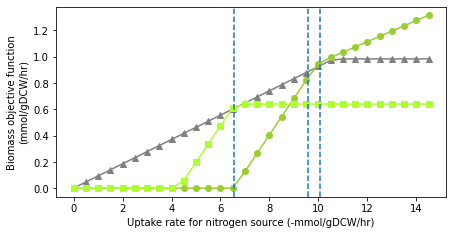

In [105]:
plt.figure(figsize=(7, 3.5))
plt.plot(rxn_range, sorted(nh4_bof.values()), color = 'grey', marker='^')
plt.plot(rxn_range, sorted(cytd_bof.values()), color = 'yellowgreen', marker='o')
plt.plot(rxn_range, sorted(csn_bof.values()), color = 'greenyellow', marker='s')

plt.xlabel("Uptake rate for nitrogen source (-mmol/gDCW/hr)")
plt.ylabel("Biomass objective function\n(mmol/gDCW/hr)")
plt.axvline(x = -final_nh4_uptake, linestyle='--')
plt.axvline(x= -final_cytd_uptake, linestyle='--')
plt.axvline(x= -final_csn_uptake, linestyle='--')

#plt.savefig('Predicted_nitrogen_uptake_rate.svg')
plt.show()